In [1]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler, LabelEncoder
    from imblearn.over_sampling import SMOTE, RandomOverSampler
    from sklearn.model_selection import train_test_split
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import SGD, Adam
    from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("student-mat.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [5]:
df = df.drop(columns=['school','G1','G2'])

In [6]:
df.G3.unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4], dtype=int64)

In [7]:
df['G3']=df['G3']/2

<AxesSubplot:title={'center':'PEARSON'}>

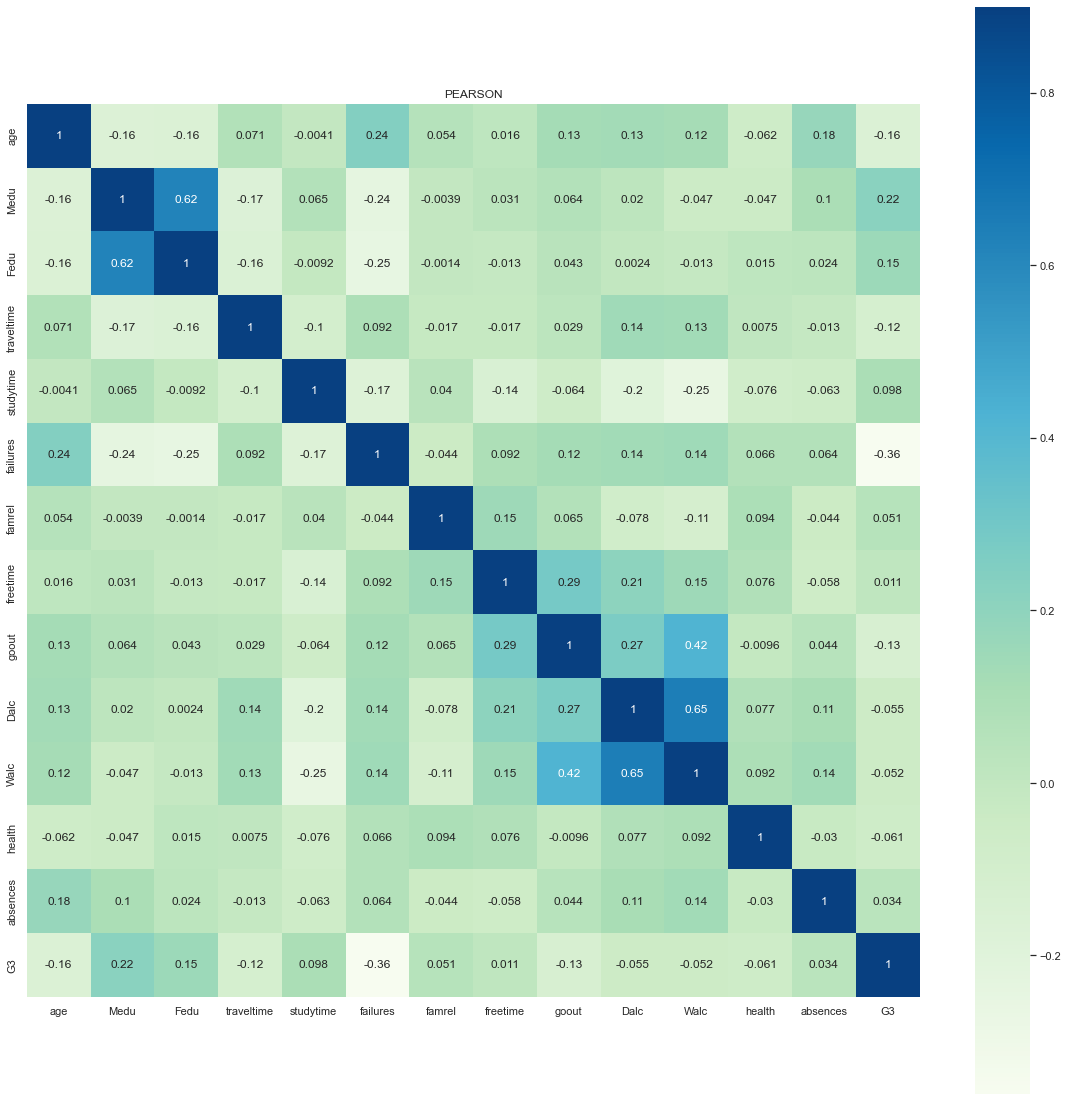

In [8]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(20,20))
plt.title("PEARSON")
sns.heatmap(df.corr(method='pearson'), vmax=0.9, cmap="GnBu", square=True, linecolor='b', annot=True)

In [9]:
df.loc[(df['G3']>9),'Nota']='A'
df.loc[(df['G3']>=8) & (df['G3']<=9),'Nota']='B'
df.loc[(df['G3']>=6) & (df['G3']<8),'Nota']='C'
df.loc[(df['G3']>=5) & (df['G3']<6),'Nota']='D'
df.loc[df['G3']<5,'Nota']='F'

In [10]:
df = df.drop(columns=['G3'])

In [11]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:title={'center':'PEARSON'}>

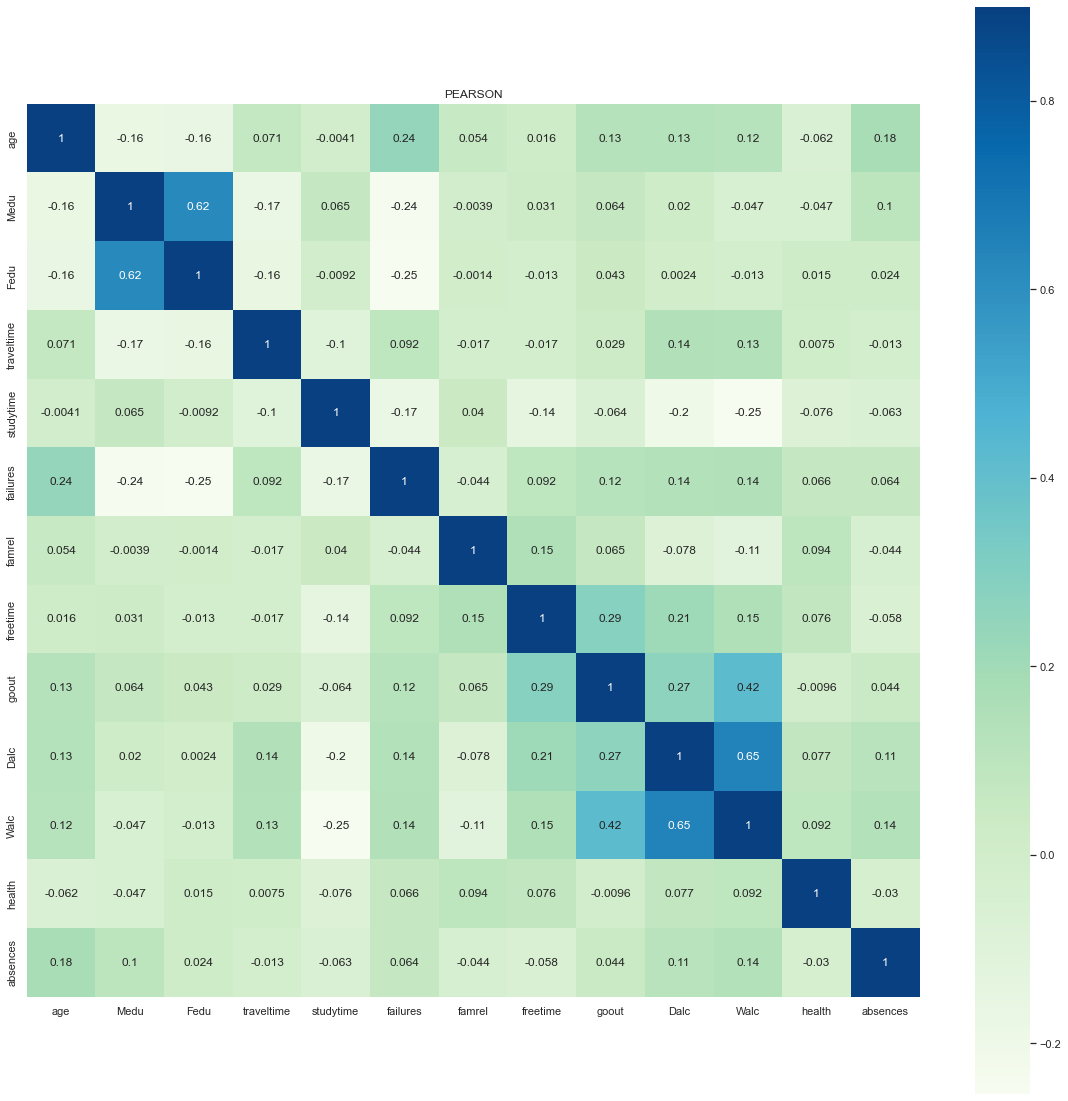

In [12]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(20,20))
plt.title("PEARSON")
sns.heatmap(df.corr(method='pearson'), vmax=0.9, cmap="GnBu", square=True, linecolor='b', annot=True)

In [13]:
##Health, famrel
df = df.drop(columns=['famrel','health'])


<AxesSubplot:xlabel='absences', ylabel='count'>

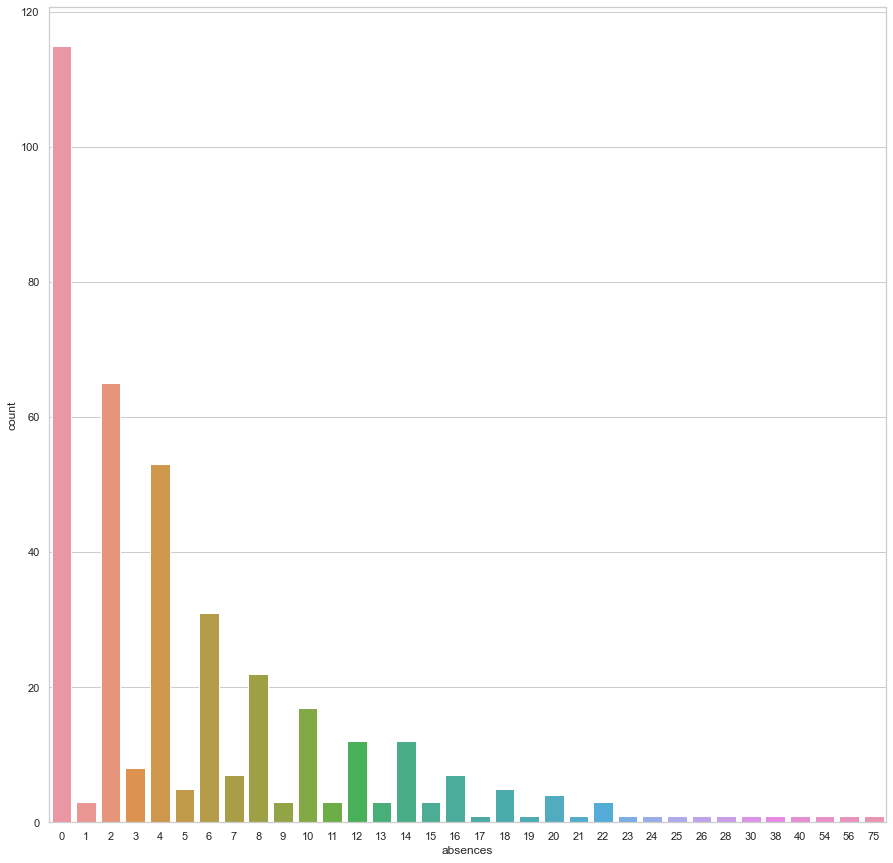

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'absences',data=df)

In [15]:
df["absences"] = df["absences"].replace(range(1,77), "Falta")

In [16]:
df["absences"] = df["absences"].replace(0, "no_Falta")

<AxesSubplot:xlabel='absences', ylabel='count'>

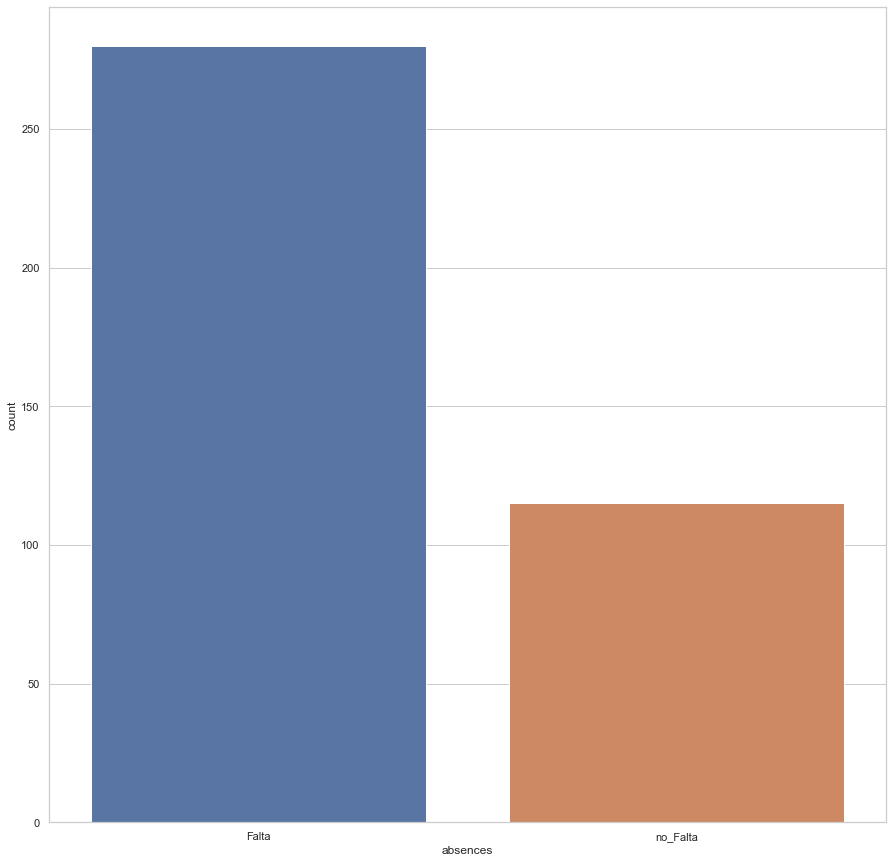

In [17]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'absences',data=df)

In [18]:
df.address.value_counts()

U    307
R     88
Name: address, dtype: int64

In [19]:
df.famsize.value_counts()#Con esto se busca anormalidades, muchas variables que se puedan agrupar o valores con el mismo nombre

GT3    281
LE3    114
Name: famsize, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

In [21]:
df.Pstatus.value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [22]:
df.Mjob.value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [23]:
df.Fjob.value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [24]:
df.reason.value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [25]:
df.guardian.value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [26]:
df.schoolsup.value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [27]:
df.famsup.value_counts()

yes    242
no     153
Name: famsup, dtype: int64

In [28]:
df.paid.value_counts()

no     214
yes    181
Name: paid, dtype: int64

<AxesSubplot:xlabel='Nota', ylabel='count'>

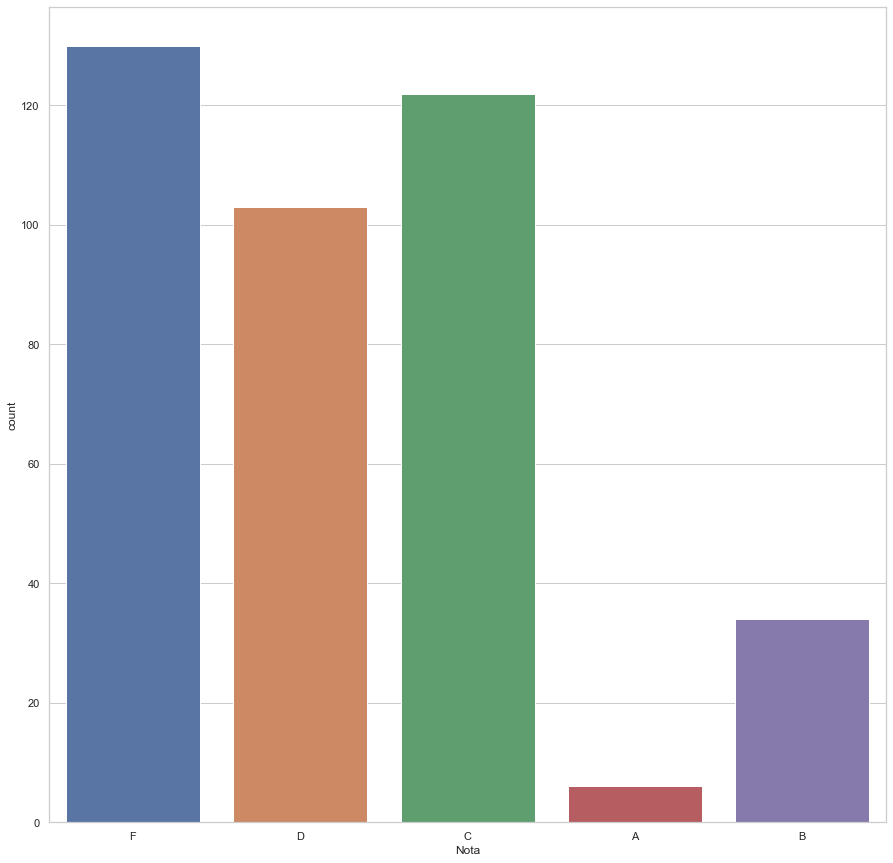

In [29]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'Nota',data=df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>],
       [<AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>],
       [<AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>],
       [<AxesSubplot:title={'center':'Walc'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

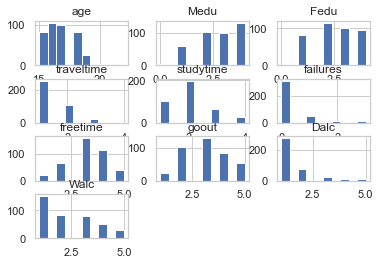

In [30]:
df.hist()

In [31]:
x=df.drop(columns=['Nota']) ##1 columnas, 0 filas
y=df['Nota']

In [32]:
##Aplicación de Dummies
x = pd.get_dummies(x)

In [33]:
x_df=pd.DataFrame(x)

In [34]:
x_df

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,Dalc,Walc,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,absences_Falta,absences_no_Falta
0,18,4,4,2,2,0,3,4,1,1,...,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,3,3,1,1,...,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,3,3,2,2,3,...,0,1,0,1,0,1,1,0,1,0
3,15,4,2,1,3,0,2,2,1,1,...,0,1,0,1,0,1,0,1,1,0
4,16,3,3,1,2,0,3,2,1,2,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,4,4,5,...,0,1,0,1,1,0,1,0,1,0
391,17,3,1,2,1,0,4,5,3,4,...,1,0,0,1,0,1,1,0,1,0
392,21,1,1,1,1,3,5,3,3,3,...,1,0,0,1,1,0,1,0,1,0
393,18,3,2,3,1,0,4,1,3,4,...,1,0,0,1,0,1,1,0,0,1


In [35]:
y

0      F
1      F
2      D
3      C
4      D
      ..
390    F
391    B
392    F
393    D
394    F
Name: Nota, Length: 395, dtype: object

In [36]:
##Escalado de datos
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [37]:
##Balanceo
smoteS=SMOTE()
x_smoteS, y_smoteS=smoteS.fit_resample(x,y)
pd.Series(y_smoteS).value_counts()

F    130
D    130
C    130
A    130
B    130
Name: Nota, dtype: int64

<AxesSubplot:xlabel='Nota', ylabel='count'>

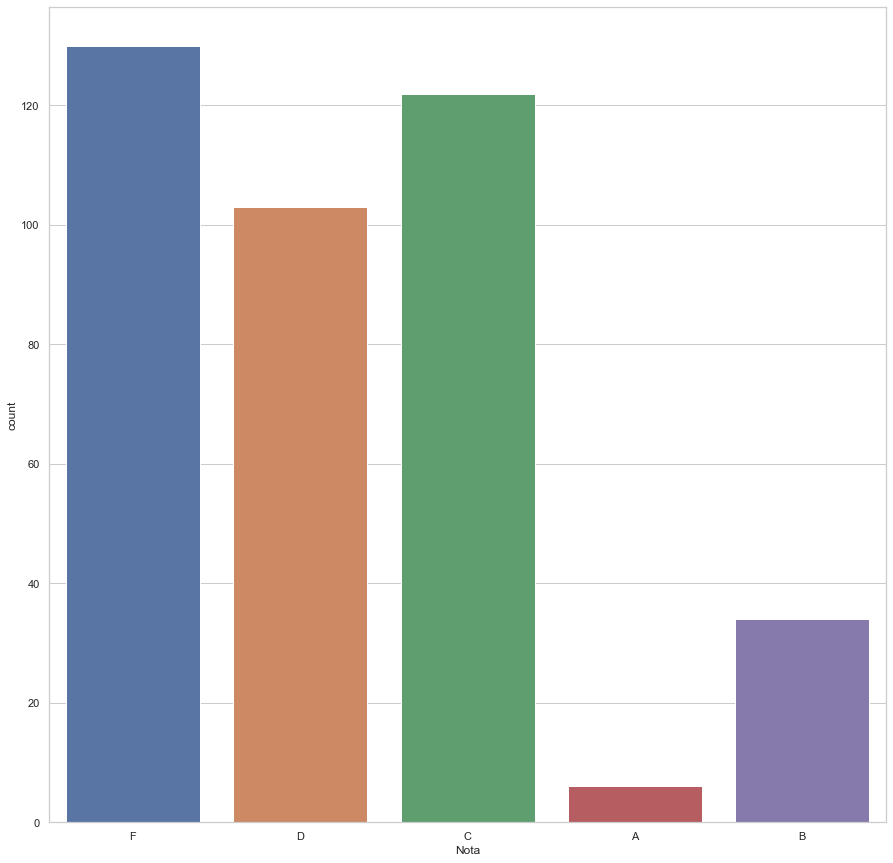

In [38]:
plt.figure(figsize=(15,15))
sns.countplot(x = y,data=y)

<AxesSubplot:xlabel='Nota', ylabel='count'>

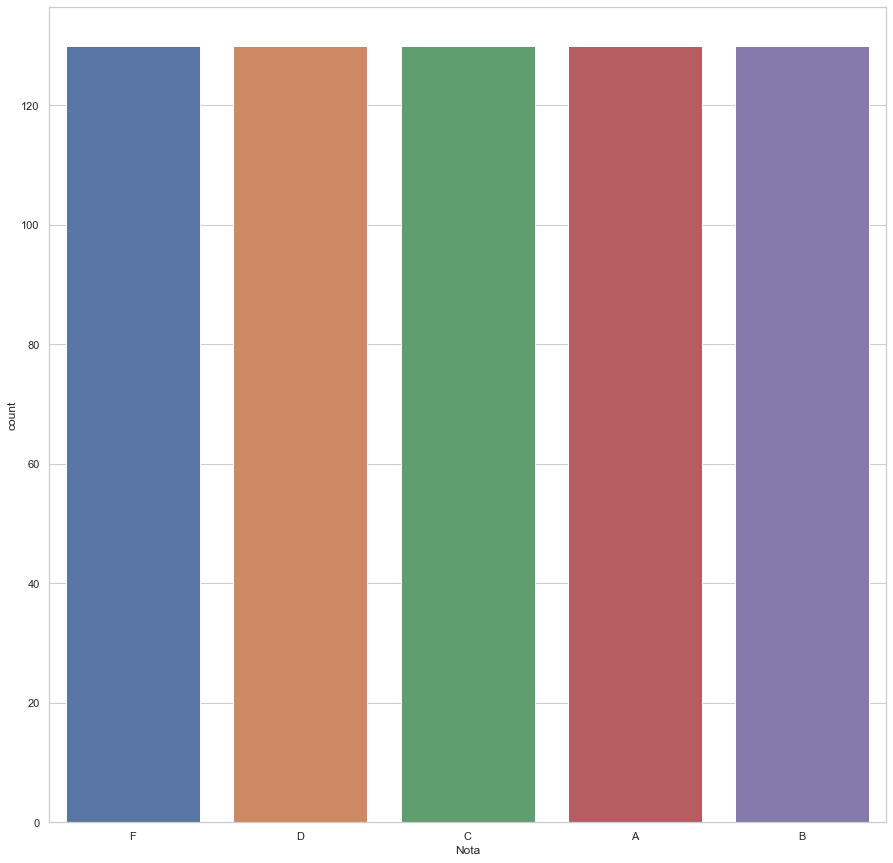

In [39]:
plt.figure(figsize=(15,15))
sns.countplot(x = y_smoteS,data=y_smoteS)

In [40]:
##Aplicación de Dummies
y_smoteS= pd.get_dummies(y_smoteS)

In [41]:
y_df=pd.DataFrame(y_smoteS)

In [42]:
y_df.value_counts()

A  B  C  D  F
0  0  0  0  1    130
         1  0    130
      1  0  0    130
   1  0  0  0    130
1  0  0  0  0    130
dtype: int64

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x_smoteS, y_smoteS, random_state=0, test_size=0.3)

In [44]:
model=Sequential()
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid')) #Comunmente esto al final
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=5, epochs=200, verbose=1)

Epoch 1/200
91/91 [==============================] - 3s 8ms/step - loss: 1.6888 - accuracy: 0.1912 - val_loss: 1.6225 - val_accuracy: 0.2205
Epoch 2/200
91/91 [==============================] - 0s 5ms/step - loss: 1.6268 - accuracy: 0.2022 - val_loss: 1.6030 - val_accuracy: 0.2359
Epoch 3/200
91/91 [==============================] - 0s 5ms/step - loss: 1.6086 - accuracy: 0.2132 - val_loss: 1.5965 - val_accuracy: 0.2615
Epoch 4/200
91/91 [==============================] - 0s 3ms/step - loss: 1.5971 - accuracy: 0.2857 - val_loss: 1.5872 - val_accuracy: 0.3590
Epoch 5/200
91/91 [==============================] - 0s 3ms/step - loss: 1.5817 - accuracy: 0.3758 - val_loss: 1.5681 - val_accuracy: 0.4513
Epoch 6/200
91/91 [==============================] - 0s 4ms/step - loss: 1.5575 - accuracy: 0.3956 - val_loss: 1.5340 - val_accuracy: 0.4103
Epoch 7/200
91/91 [==============================] - 1s 6ms/step - loss: 1.5205 - accuracy: 0.3934 - val_loss: 1.4872 - val_accuracy: 0.4359
Epoch 8/200
9

Epoch 59/200
91/91 [==============================] - 0s 3ms/step - loss: 0.9061 - accuracy: 0.6110 - val_loss: 0.9842 - val_accuracy: 0.5590
Epoch 60/200
91/91 [==============================] - 0s 3ms/step - loss: 0.9007 - accuracy: 0.6308 - val_loss: 0.9850 - val_accuracy: 0.5590
Epoch 61/200
91/91 [==============================] - 0s 5ms/step - loss: 0.8965 - accuracy: 0.6132 - val_loss: 0.9792 - val_accuracy: 0.6103
Epoch 62/200
91/91 [==============================] - 0s 5ms/step - loss: 0.8918 - accuracy: 0.6462 - val_loss: 0.9833 - val_accuracy: 0.6000
Epoch 63/200
91/91 [==============================] - 0s 3ms/step - loss: 0.8914 - accuracy: 0.6220 - val_loss: 0.9756 - val_accuracy: 0.6000
Epoch 64/200
91/91 [==============================] - 0s 3ms/step - loss: 0.8885 - accuracy: 0.6264 - val_loss: 0.9712 - val_accuracy: 0.6308
Epoch 65/200
91/91 [==============================] - 0s 4ms/step - loss: 0.8836 - accuracy: 0.6396 - val_loss: 0.9663 - val_accuracy: 0.6410
Epoch 

91/91 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.8220 - val_loss: 0.9701 - val_accuracy: 0.6308
Epoch 173/200
91/91 [==============================] - 1s 9ms/step - loss: 0.4880 - accuracy: 0.8264 - val_loss: 0.9678 - val_accuracy: 0.6359
Epoch 174/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4885 - accuracy: 0.8242 - val_loss: 0.9678 - val_accuracy: 0.6513
Epoch 175/200
91/91 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.8242 - val_loss: 0.9718 - val_accuracy: 0.6513
Epoch 176/200
91/91 [==============================] - 1s 6ms/step - loss: 0.4801 - accuracy: 0.8286 - val_loss: 0.9717 - val_accuracy: 0.6462
Epoch 177/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.8308 - val_loss: 0.9740 - val_accuracy: 0.6410
Epoch 178/200
91/91 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.8374 - val_loss: 0.9763 - val_accuracy: 0.6462
Epoch 179/200

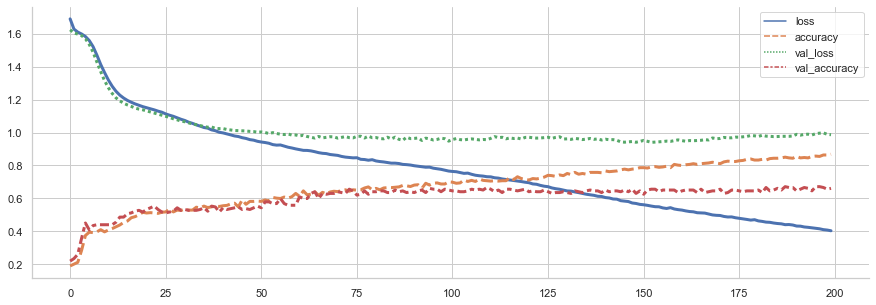

In [46]:
##Generar perdida y accuracy
loss=pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [174]:
model.fit(x_train, y_train)

15/15 [==============================] - 0s 21ms/step - loss: 0.3927 - accuracy: 0.8725


In [175]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [176]:
y_train

,A,B,C,D,F
561,0,1,0,0,0
452,1,0,0,0,0
89,0,0,0,0,1
299,0,1,0,0,0
231,0,0,0,1,0
...,...,...,...,...,...
9,0,0,1,0,0
359,0,1,0,0,0
192,0,0,0,0,1
629,0,0,0,1,0


In [177]:
df_y_pred_t=pd.DataFrame(y_pred_train)

In [178]:
df_y_pred_t.columns=['A','B','C', 'D', 'F']

In [179]:
df_y_pred_t

,A,B,C,D,F
0,0.003494,0.984553,0.589984,0.088439,0.031563
1,0.975680,0.000530,0.374138,0.302069,0.000194
2,0.000083,0.006183,0.808372,0.509120,0.933717
3,0.003731,0.986558,0.586132,0.083581,0.030661
4,0.000092,0.022113,0.606447,0.884550,0.550849
...,...,...,...,...,...
450,0.001061,0.157902,0.845531,0.074643,0.171266
451,0.004470,0.962567,0.605240,0.108576,0.022044
452,0.000070,0.007908,0.730172,0.764790,0.905796
453,0.000093,0.002798,0.724369,0.858853,0.841455


In [182]:
prob = df_y_pred_t.max(axis = 1) 

In [183]:
prob

0      0.984553
1      0.975680
2      0.933717
3      0.986558
4      0.884550
         ...   
450    0.845531
451    0.962567
452    0.905796
453    0.858853
454    0.985293
Length: 455, dtype: float32

In [184]:
clase_p=df_y_pred_t.idxmax(axis=1)

In [185]:
clase_a=y_train.idxmax(axis=1)

In [186]:
clase_a

561    B
452    A
89     F
299    B
231    D
      ..
9      C
359    B
192    F
629    D
559    B
Length: 455, dtype: object

In [187]:
clase_a.reset_index(inplace=True, drop=True)

In [188]:
clase_a

0      B
1      A
2      F
3      B
4      D
      ..
450    C
451    B
452    F
453    D
454    B
Length: 455, dtype: object

In [189]:
df_mc=pd.concat([clase_p, clase_a, prob], axis=1)

In [190]:
df_mc.columns=['clase_pred', 'clase_a', 'Prob']

In [191]:
df_mc

,clase_pred,clase_a,Prob
0,B,B,0.984553
1,A,A,0.975680
2,F,F,0.933717
3,B,B,0.986558
4,D,D,0.884550
...,...,...,...
450,C,C,0.845531
451,B,B,0.962567
452,F,F,0.905796
453,D,D,0.858853


In [192]:
MC=pd.crosstab(df_mc.clase_pred,df_mc.clase_a)

In [193]:
MC

clase_a,A,B,C,D,F
clase_pred,,,,,
A,90,0,1,1,0
B,0,93,0,0,0
C,0,0,70,5,2
D,0,0,12,70,11
F,0,0,14,12,74


<AxesSubplot:xlabel='clase_a', ylabel='clase_pred'>

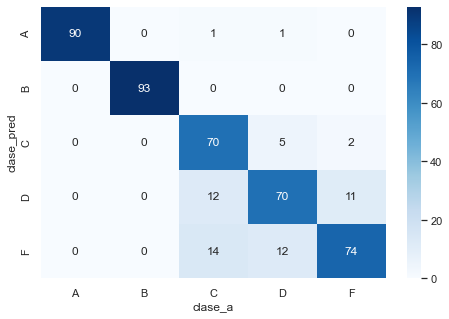

In [194]:
fig=plt.figure(figsize=(17,5))
ax1=plt.subplot(121)
sns.heatmap(MC, annot=True, cmap='Blues')